# 1.1 Redução de Dimensionalidade

## Preparando Dados para Modelos de Machine Learning

In [41]:
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.spatial.distance import cdist


from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

import pandas as pd
import os
import cv2 
import umap
import matplotlib.pyplot as plt


lista_pastas = os.listdir("RecFac")
X = np.empty((128*120,0))
for pasta in lista_pastas:
        lista_imagens = os.listdir(f"RecFac\\{pasta}")
        for imagens in lista_imagens:
                img = cv2.imread(f"RecFac\\{pasta}\\{imagens}", cv2.IMREAD_GRAYSCALE)
                x = img.flatten()
                X = np.hstack((
                        X,x.reshape(len(x),1)
                ))


print(X.shape)

X = X.T

(15360, 640)


## Redução de Dimensionalidade

### Com t-SNE

(640, 3)


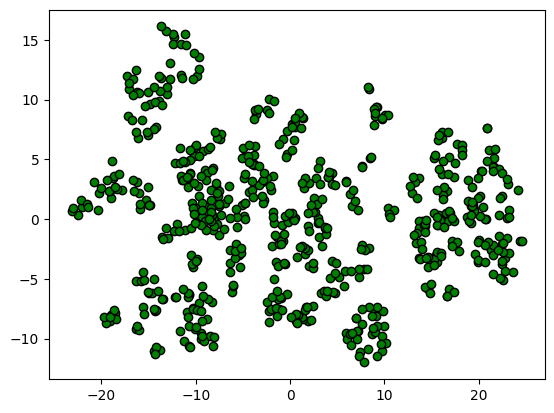

In [42]:
# 1: tsne
tsne = TSNE(n_components=3, random_state=42)
X_red1 = tsne.fit_transform(X)
print(X_red1.shape)
plt.figure(1)

plt.scatter(X_red1[:,0],X_red1[:,1], edgecolors='k',c='green')
plt.show()

### PCA

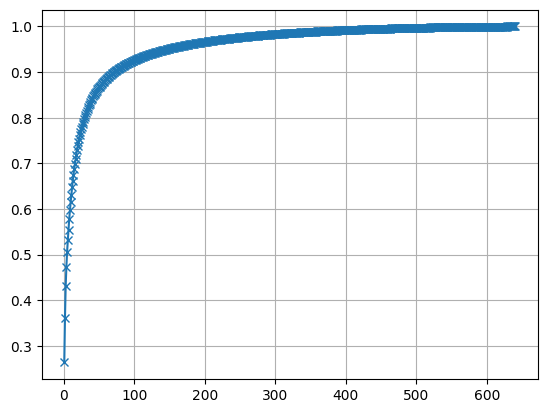

In [43]:
#2: PCA 
pca = PCA()
pca.fit(X)
plt.figure(2)
x2 = np.arange(1,641,1)
y2 = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x2,y2,marker='x')
plt.grid()
plt.show()

### Redução de Dimensionalidade com PCA para 90% da Variância

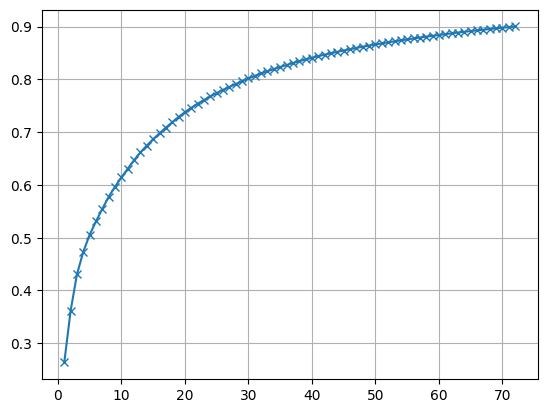

In [44]:
# variância de 90%: x = 71.77 = 72
pca = PCA(n_components=72)
X_red2 = pca.fit_transform(X)

plt.figure(2)
x2 = np.arange(1,73,1)
y2 = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x2,y2,marker='x')
plt.grid()
plt.show()

### Redução de Dimensionalidade com PCA para 80% da Variância

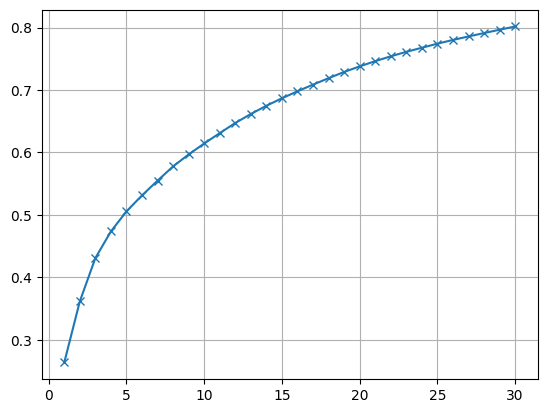

In [45]:
# variância de 80%: x = 29.62 = 30

pca = PCA(n_components=30)
X_red3 = pca.fit_transform(X)

plt.figure(2)
x2 = np.arange(1,31,1)
y2 = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x2,y2,marker='x')
plt.grid()
plt.show()


### Redução de Dimensionalidade com PCA para 75% da Variância

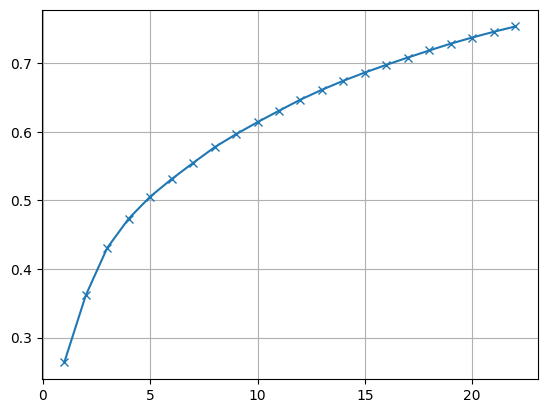

In [46]:
#  variância de 75%: x = 21.68 = 22


pca = PCA(n_components=22)
X_red4 = pca.fit_transform(X)

plt.figure(2)
x2 = np.arange(1,23,1)
y2 = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x2,y2,marker='x')
plt.grid()
plt.show()

### para 2D com UMAP:

c:\Users\sidne\OneDrive\Documentos\GitHub\projeto_final_ML_unifor\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


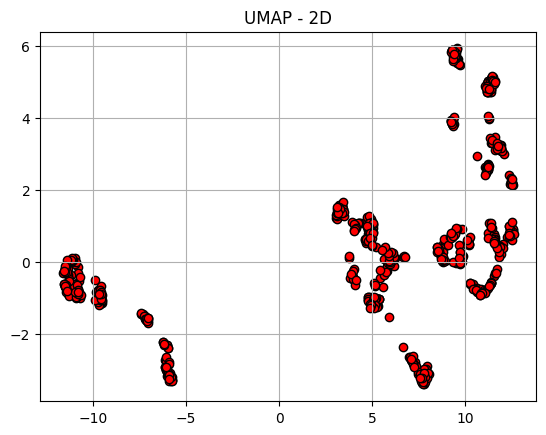

In [47]:
# 2D
umap_var = umap.UMAP(n_components=2, random_state=42)
X_red5 = umap_var.fit_transform(X)
plt.figure(3)
plt.scatter(X_red5[:, 0], X_red5[:, 1], c='r', edgecolor='k')
plt.title("UMAP - 2D")
plt.grid()
plt.show()

### para 3D com UMAP (Projeção 2D para Visualização)

c:\Users\sidne\OneDrive\Documentos\GitHub\projeto_final_ML_unifor\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


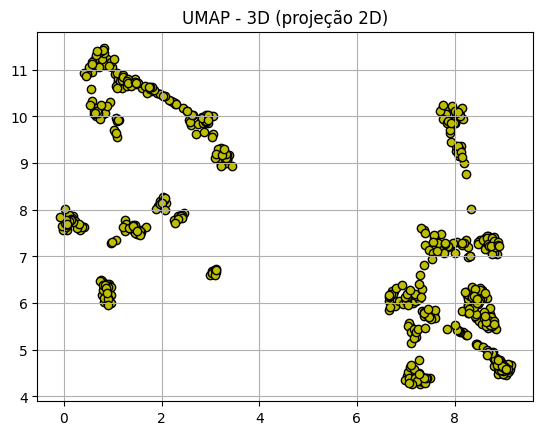

In [48]:
# 3D
umap_var = umap.UMAP(n_components=3, random_state=42)
X_red6 = umap_var.fit_transform(X)
plt.figure(4)
plt.scatter(X_red6[:, 0], X_red6[:, 1], c='y', edgecolor='k')
plt.title("UMAP - 3D (projeção 2D)")
plt.grid()
plt.show()

### para 15D com UMAP (Projeção 2D para Visualização)

c:\Users\sidne\OneDrive\Documentos\GitHub\projeto_final_ML_unifor\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


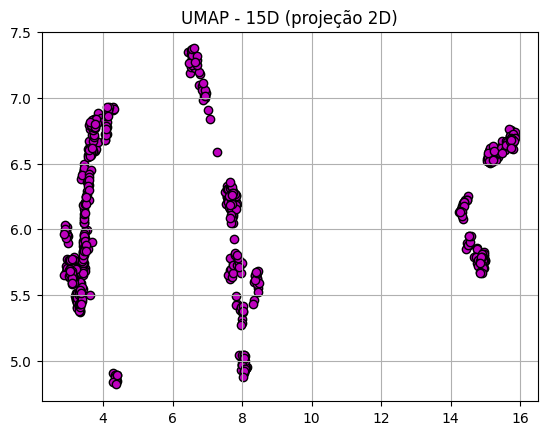

In [49]:
# 15D
umap_var = umap.UMAP(n_components=15, random_state=42)
X_red7 = umap_var.fit_transform(X)
plt.figure(5)
plt.scatter(X_red7[:, 0], X_red7[:, 1], c='m', edgecolor='k')
plt.title("UMAP - 15D (projeção 2D)")
plt.grid()
plt.show()

### para 55D com UMAP (Projeção 2D para Visualização)

c:\Users\sidne\OneDrive\Documentos\GitHub\projeto_final_ML_unifor\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


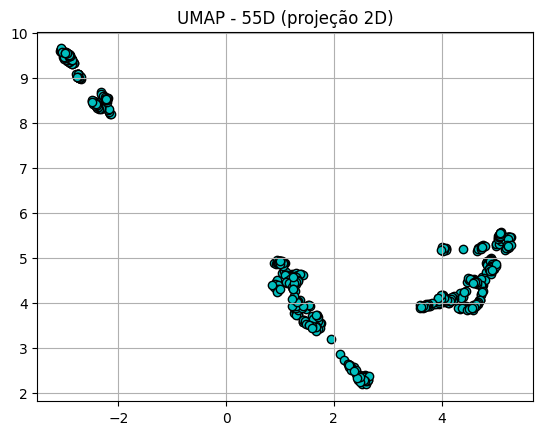

In [50]:
#  55D
umap_var = umap.UMAP(n_components=55, random_state=42)
X_red8 = umap_var.fit_transform(X)
plt.figure(6)
plt.scatter(X_red8[:, 0], X_red8[:, 1], c='c', edgecolor='k')
plt.title("UMAP - 55D (projeção 2D)")
plt.grid()
plt.show()

### para 101D com UMAP (Projeção 2D para Visualização)

c:\Users\sidne\OneDrive\Documentos\GitHub\projeto_final_ML_unifor\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


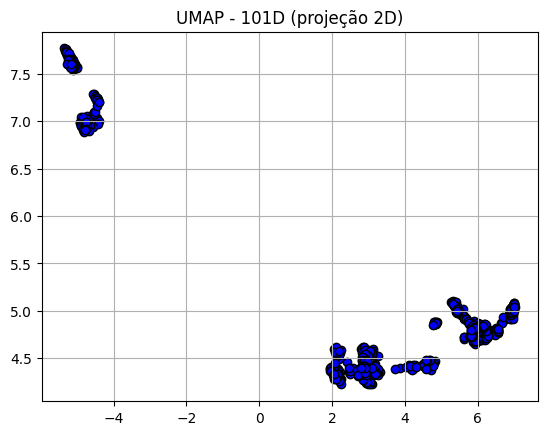

In [51]:
 # 101D
umap_var = umap.UMAP(n_components=101, random_state=42)
X_red9 = umap_var.fit_transform(X)
plt.figure(7)
plt.scatter(X_red9[:, 0], X_red9[:, 1], c='b', edgecolor='k')
plt.title("UMAP - 101D (projeção 2D)")
plt.grid()
plt.show()

# 1.2 Algoritmos de Clusterização

## Função do Indice de Dunn

In [52]:

def dunn_index(X, labels):
    clusters = np.unique(labels)
    # calcula dispersão (diâmetro máximo de cada cluster)
    intra_dists = []
    for c in clusters:
        pontos = X[labels == c]
        if len(pontos) > 1:
            intra_dists.append(np.max(cdist(pontos, pontos)))
    delta = max(intra_dists)  # maior dispersão interna
    
    # calcula menor distância entre clusters
    inter_dists = []
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            pontos_i = X[labels == clusters[i]]
            pontos_j = X[labels == clusters[j]]
            inter_dists.append(np.min(cdist(pontos_i, pontos_j)))
    big_delta = min(inter_dists)  # menor distância entre clusters
    
    return big_delta / delta

## Seleção da Melhor Redução de Dimensionalidade: UMAP 55D

### Justificativa
- **UMAP** demonstrou ser eficiente na preservação da estrutura local e global dos dados.
- A redução para **55 dimensões** foi a que proporcionou a melhor separação visual entre os clusters, conforme mostrado nos gráficos de dispersão.
- Outras técnicas, como PCA ou t-SNE, não apresentaram resultados tão satisfatórios em termos de precisão e separação.

Portanto, o **UMAP 55D** será utilizado para realizar a clusterização final dos dados.


### Teste com K-means (variando número de clusters)

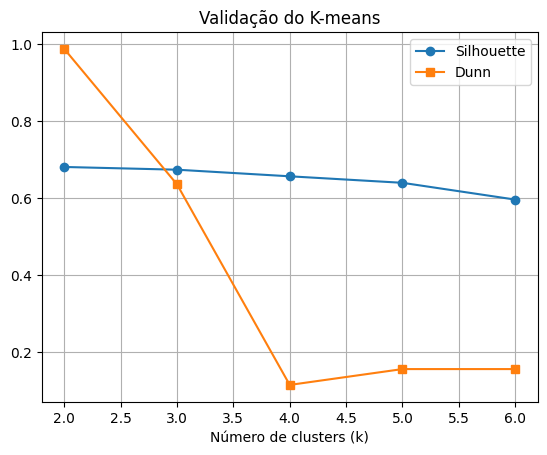

In [53]:
X_cluster = X_red8  # UMAP 55D

k_values = range(2, 7)
sil_scores_kmeans = []
dunn_scores_kmeans = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    sil_scores_kmeans.append(silhouette_score(X_cluster, labels))
    dunn_scores_kmeans.append(dunn_index(X_cluster, labels))

plt.plot(k_values, sil_scores_kmeans, marker='o', label="Silhouette")
plt.plot(k_values, dunn_scores_kmeans, marker='s', label="Dunn")
plt.title("Validação do K-means")
plt.xlabel("Número de clusters (k)")
plt.legend()
plt.grid()
plt.show()

### Teste com K-medoids (variando número de clusters)

In [54]:

sil_scores_kmedoids = []
dunn_scores_kmedoids = []

data = X_cluster.tolist()  # converter para lista de listas

for k in k_values:
    # selecionar k medoids iniciais aleatórios
    initial_medoids = np.random.choice(len(data), k, replace=False).tolist()
    
    # criar instância do k-medoids e executar
    kmedoids_instance = kmedoids(data, initial_medoids, data_type='points')
    kmedoids_instance.process()
    
    clusters = kmedoids_instance.get_clusters()  # lista de clusters (índices dos pontos)
    
    # criar rótulos a partir dos clusters
    labels = np.zeros(len(data))
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_id
            
    sil_scores_kmedoids.append(silhouette_score(X_cluster, labels))
    dunn_scores_kmedoids.append(dunn_index(X_cluster, labels))


## Escolha do número de clusters (k)

Com base na separação visual dos dados (UMAP 55D) e nas métricas de validação, o valor **k = 3** se mostrou o mais equilibrado, com boa separação entre os grupos e alta coesão interna.

A seguir, aplicamos os algoritmos com k=3 e visualizamos os agrupamentos finais.


#### Resultado Final com K-means

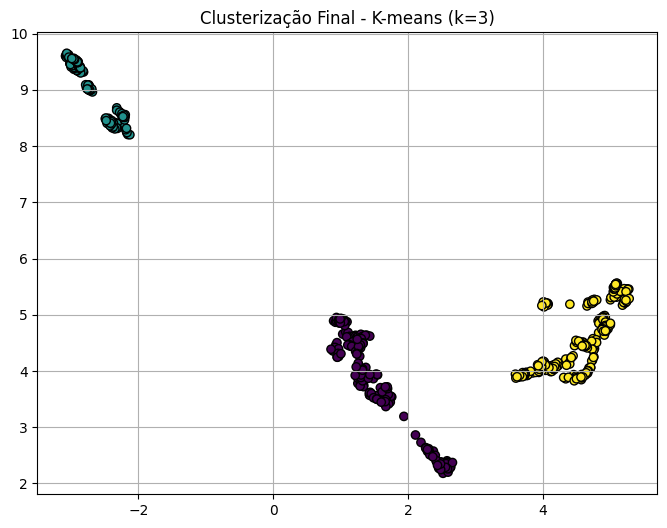

Silhouette (K-means): 0.6732770204544067
Dunn Index (K-means): 0.6352112261493007


In [55]:
# K-means final
kmeans_final = KMeans(n_clusters=3, random_state=42)
labels_kmeans_final = kmeans_final.fit_predict(X_cluster)

plt.figure(figsize=(8,6))
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=labels_kmeans_final, cmap='viridis', edgecolor='k')
plt.title("Clusterização Final - K-means (k=3)")
plt.grid()
plt.show()

print("Silhouette (K-means):", silhouette_score(X_cluster, labels_kmeans_final))
print("Dunn Index (K-means):", dunn_index(X_cluster, labels_kmeans_final))


#### Resultado Final com K-medoids

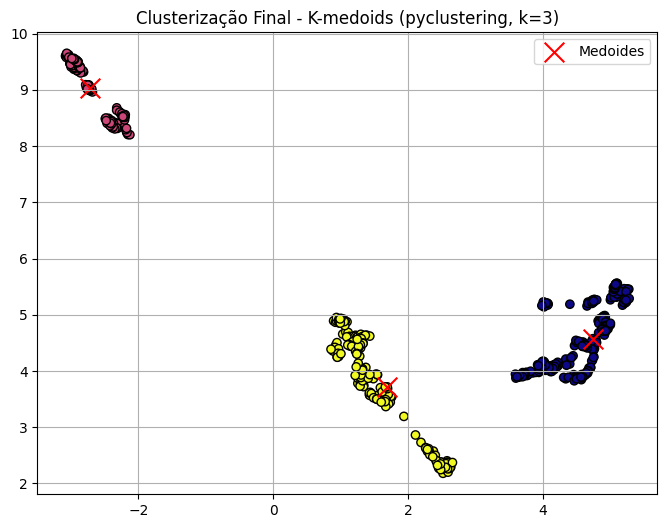

Silhouette (K-medoids): 0.6732770204544067
Dunn Index (K-medoids): 0.6352112261493007


In [56]:
k = 3
initial_medoids = np.random.choice(len(data), k, replace=False).tolist()
kmedoids_instance = kmedoids(data, initial_medoids, data_type='points')
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()
medoids_indices = kmedoids_instance.get_medoids()
medoids_final = X_cluster[medoids_indices]

labels_kmedoids_final = np.zeros(len(data))
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        labels_kmedoids_final[index] = cluster_id

plt.figure(figsize=(8,6))
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=labels_kmedoids_final, cmap='plasma', edgecolor='k')
plt.scatter(medoids_final[:, 0], medoids_final[:, 1], c='red', marker='x', s=200, label="Medoides")
plt.title("Clusterização Final - K-medoids (pyclustering, k=3)")
plt.legend()
plt.grid()
plt.show()

print("Silhouette (K-medoids):", silhouette_score(X_cluster, labels_kmedoids_final))
print("Dunn Index (K-medoids):", dunn_index(X_cluster, labels_kmedoids_final))


In [57]:

# K-means 
kmeans_final = KMeans(n_clusters=3, random_state=42)
labels_kmeans_final = kmeans_final.fit_predict(X_cluster)

# K-medoids 
initial_medoids = np.random.choice(len(X_cluster), 3, replace=False).tolist()
kmedoids_instance = kmedoids(X_cluster.tolist(), initial_medoids, data_type='points')
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
labels_kmedoids_final = np.zeros(len(X_cluster))
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        labels_kmedoids_final[index] = cluster_id

# Métricas 
results = {
    "Algoritmo": ["K-means", "K-medoids"],
    "Silhouette Score": [
        silhouette_score(X_cluster, labels_kmeans_final),
        silhouette_score(X_cluster, labels_kmedoids_final)
    ],
    "Índice de Dunn": [
        dunn_index(X_cluster, labels_kmeans_final),
        dunn_index(X_cluster, labels_kmedoids_final)
    ],
    "ARI (comparação)": [
        adjusted_rand_score(labels_kmeans_final, labels_kmeans_final),
        adjusted_rand_score(labels_kmeans_final, labels_kmedoids_final)
    ]
}

df_results = pd.DataFrame(results)
print(df_results)



   Algoritmo  Silhouette Score  Índice de Dunn  ARI (comparação)
0    K-means          0.673277        0.635211               1.0
1  K-medoids          0.673277        0.635211               1.0


## Comparação Final: K-means vs K-medoids (k=3)

| Algoritmo   | Silhouette Score | Índice de Dunn | ARI (comparação) |
|-------------|------------------|----------------|------------------|
| K-means     | 0.6733           | 0.6352         | 1.0000           |
| K-medoids   | 0.6733           | 0.6352         | 1.0000           |

### Análise

- **Silhouette Score** e **Índice de Dunn** foram idênticos para os dois algoritmos.  
- O **ARI (Adjusted Rand Index) = 1.0** confirma que ambos encontraram **a mesma partição dos dados**, mesmo que a ordem dos rótulos possa variar.  
- O **K-means** se destaca pela velocidade computacional, sendo mais eficiente em grandes bases.  
- O **K-medoids**, por outro lado, é mais robusto a outliers, já que sempre escolhe pontos reais como centróides.  
- No nosso caso, os dados reduzidos para **UMAP 55D** possuem clusters bem definidos, o que fez com que os dois métodos convergissem para a mesma solução.  

Portanto, a escolha entre K-means e K-medoids aqui se torna mais uma questão de **robustez vs desempenho**, já que em termos de qualidade da clusterização, os dois chegaram no mesmo resultado.


## Comparação das métricas de validação para diferentes valores de *k*

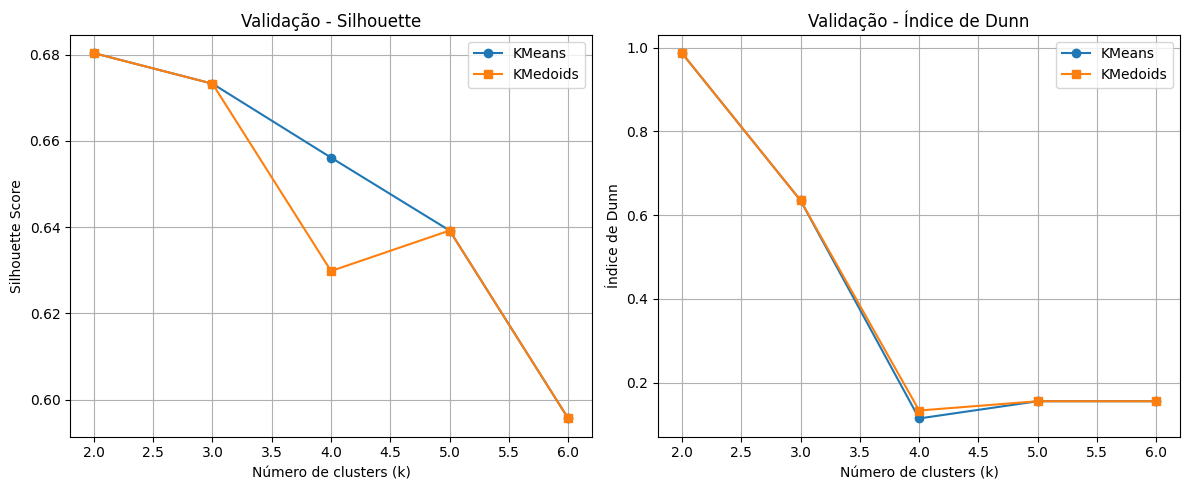

In [58]:
plt.figure(figsize=(12, 5))

# Silhouette
plt.subplot(1, 2, 1)
plt.plot(k_values, sil_scores_kmeans, marker='o', label='KMeans')
plt.plot(k_values, sil_scores_kmedoids, marker='s', label='KMedoids')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Validação - Silhouette")
plt.legend()
plt.grid()

# Dunn
plt.subplot(1, 2, 2)
plt.plot(k_values, dunn_scores_kmeans, marker='o', label='KMeans')
plt.plot(k_values, dunn_scores_kmedoids, marker='s', label='KMedoids')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Índice de Dunn")
plt.title("Validação - Índice de Dunn")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## Comparação Visual dos Agrupamentos

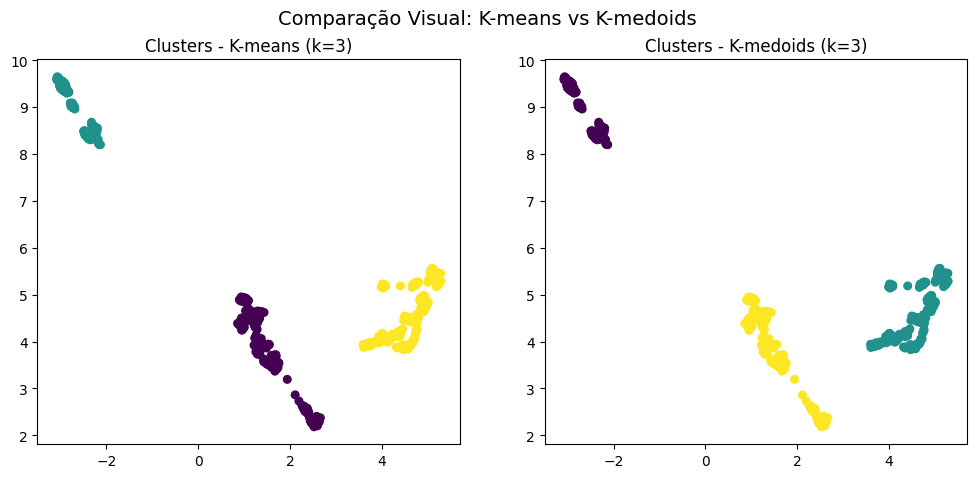

In [59]:
X_plot = X_cluster[:, :2]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-means
axes[0].scatter(X_plot[:, 0], X_plot[:, 1], c=labels_kmeans_final, cmap='viridis', s=30)
axes[0].set_title("Clusters - K-means (k=3)")

# K-medoids 
axes[1].scatter(X_plot[:, 0], X_plot[:, 1], c=labels_kmedoids_final, cmap='viridis', s=30)
axes[1].set_title("Clusters - K-medoids (k=3)")

plt.suptitle("Comparação Visual: K-means vs K-medoids", fontsize=14)
plt.show()